In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

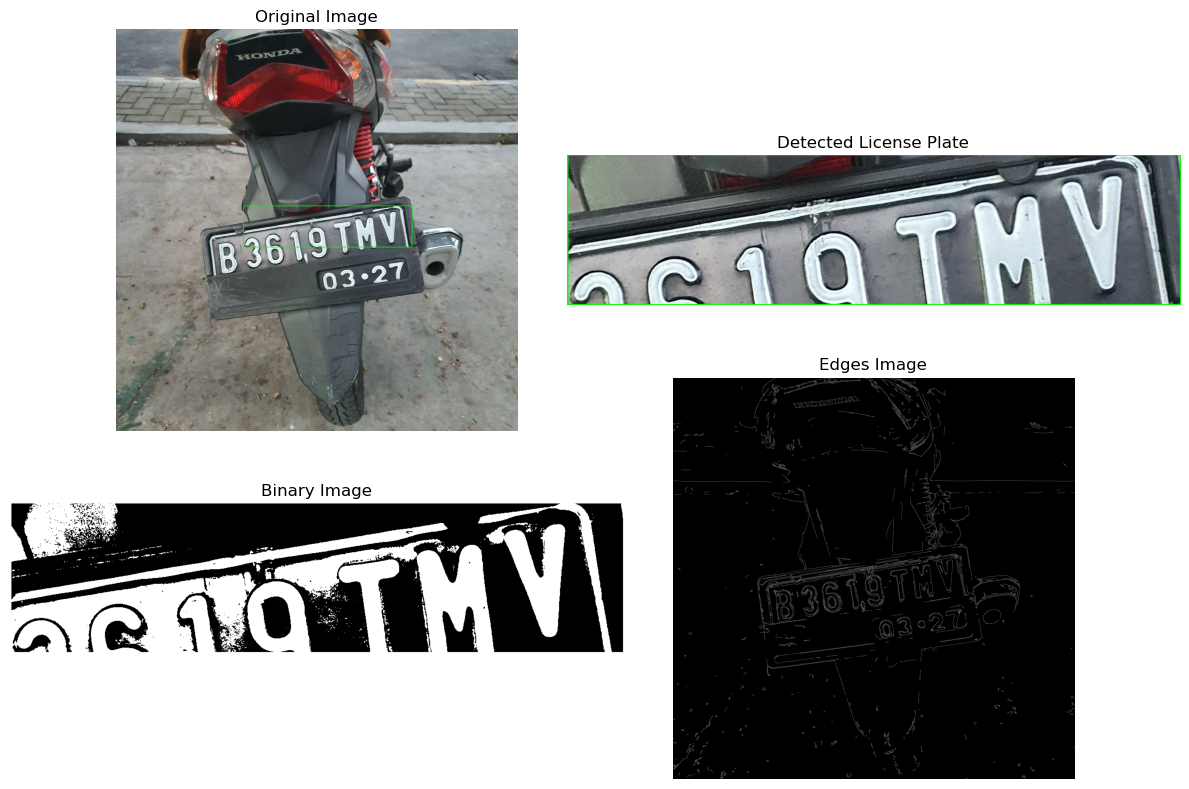

In [53]:
def detect_license_plate(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Perform dilation and erosion to close gaps in between object edges
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed image
    contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Iterate over the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the contour has four corners, it may be a license plate
        if len(approx) == 4:
            # Draw a bounding rectangle around the contour
            x, y, w, h = cv2.boundingRect(approx)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

            # Crop the license plate region
            license_plate = image[y:y + h, x:x + w]

            # Convert the license plate region to grayscale
            plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

            # Perform thresholding to create a binary image
            _, plate_binary = cv2.threshold(plate_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        # Display original image
            plt.figure(figsize=(12, 8))
            plt.subplot(2, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")

        # Plat terdeteksi :
            plt.subplot(2, 2, 2)
            plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
            plt.title("Detected License Plate")
            plt.axis("off")

        # Binary Image :
            plt.subplot(2, 2, 3)
            plt.imshow(plate_binary, cmap="gray")
            plt.title("Binary Image")
            plt.axis("off")
            
        # Edge Image :
            plt.subplot(2, 2, 4)
            plt.imshow(edges, cmap="gray")
            plt.title("Edges Image")
            plt.axis("off")

            plt.tight_layout()
            plt.show()

            break

# Example usage:
image_path = "plat.jpg"
detect_license_plate(image_path)